In [1]:
%matplotlib notebook
# %matplotlib inline

# %connect_info

import flow.misc
text = """
Jupyter connect hash:
{word}

To connect to current notebook:
    $> jupyter console --existing {filename}
    
"""
print(text.format(word=flow.misc.notebook_word(), filename=flow.misc.notebook_file(flow.misc.notebook_word())))
print("Last run: {}".format(flow.misc.timestamp()))

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)



Jupyter connect hash:
upgrading

To connect to current notebook:
    $> jupyter console --existing kernel-19153a51-c1f0-4f72-94b1-61fc122dc256.json
    

Last run: 2018-10-29-10h54m41s


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import flow
import pool

In [3]:
db=pool.database.db()
mouse = flow.metadata.Mouse('OA205')
# mouse = flow.metadata.Mouse('OA178')

## Performance

In [4]:
result = []
for date in mouse.dates():
    pass

## Vdrive fraction and response over days

In [20]:
result = []
for date in mouse.dates():
    for stim in pool.config.stimuli():
#         vdrive = db.get('vdrive_{}'.format(stim), date.mouse, date.date)
        vdrive_frac = db.get('vdrive_fraction_{}'.format(stim), date.mouse, date.date)
        vdrive = db.get('vdrive_{}'.format(stim), date.mouse, date.date)
        vdrive_frac_30 = np.nansum(vdrive > 30) / float(len(vdrive))
        result.append({'mouse': date.mouse,
                       'date': date.date,
                       'stim': stim,
                       'vdrive_frac': vdrive_frac,
                       'vdrive_frac_30': vdrive_frac_30})
df = pd.DataFrame(result)
df['reverse'] = df.date.apply(lambda x: 'pre' if x < flow.metadata.reversal(mouse.mouse) else 'post')

<IPython.core.display.Javascript object>


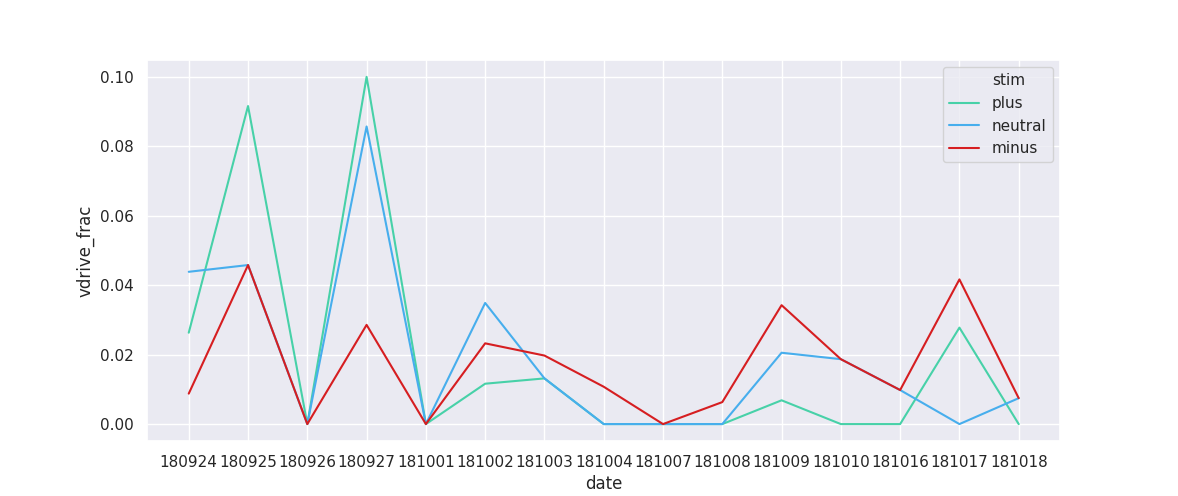

In [6]:
plt.figure()
sns.lineplot(df.date.astype('str'), df.vdrive_frac, hue=df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


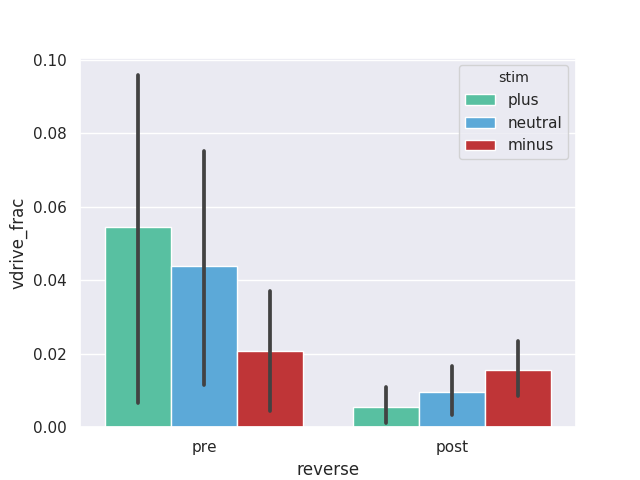

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [7]:
plt.figure()
sns.barplot(df.reverse, df.vdrive_frac, hue=df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


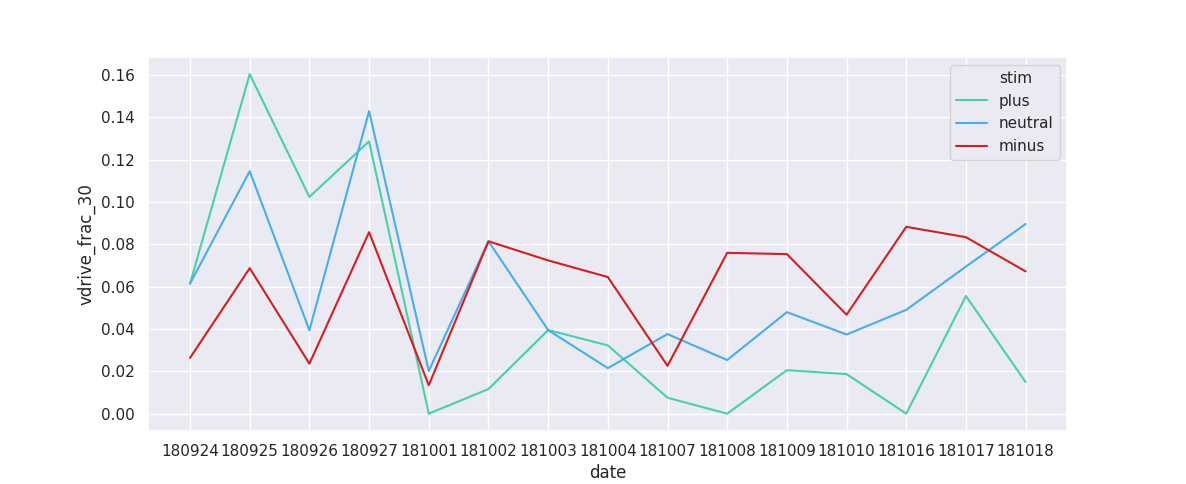

In [21]:
plt.figure()
sns.lineplot(df.date.astype('str'), df.vdrive_frac_30, hue=df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


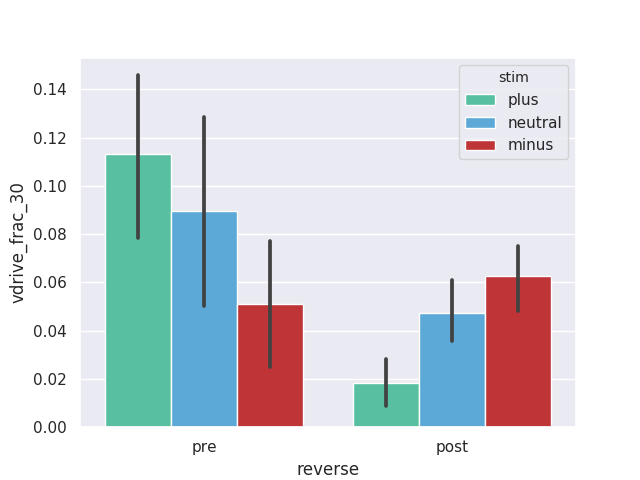

In [29]:
plt.figure()
sns.barplot(df.reverse, df.vdrive_frac_30, hue=df.stim, palette=pool.config.colors())

## vdrive frac bias

In [24]:
df_list = []
for _, group_df in df.groupby(['mouse', 'date']):
    total_frac = group_df.vdrive_frac.sum()
    total_frac_30 = group_df.vdrive_frac_30.sum()
    group_df['vdrive_frac_bias'] = group_df.vdrive_frac / total_frac
    group_df['vdrive_frac_30_bias'] = group_df.vdrive_frac_30 / total_frac_30
    df_list.append(group_df)
frac_bias_df = pd.concat(df_list, ignore_index=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


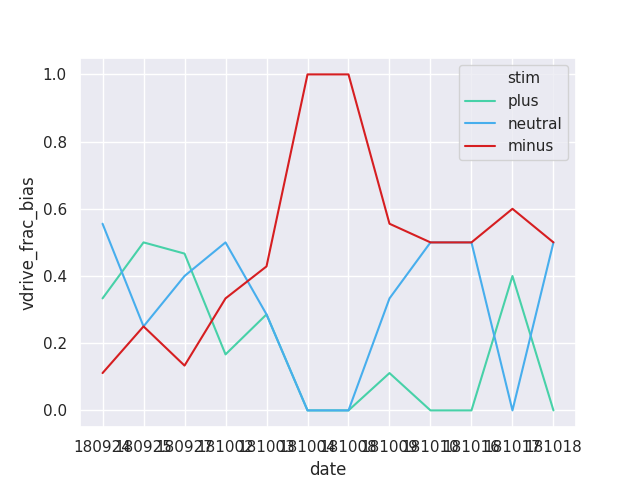

In [9]:
plt.figure()
sns.lineplot(frac_bias_df.date.astype('str'), frac_bias_df.vdrive_frac_bias, hue=df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


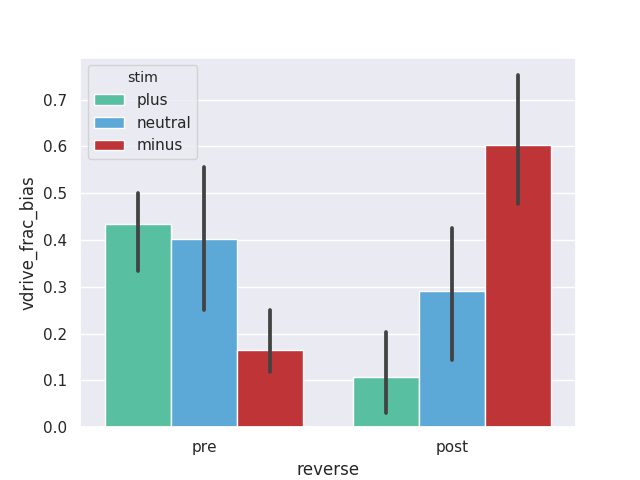

In [10]:
plt.figure()
sns.barplot(frac_bias_df.reverse, frac_bias_df.vdrive_frac_bias, hue=df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


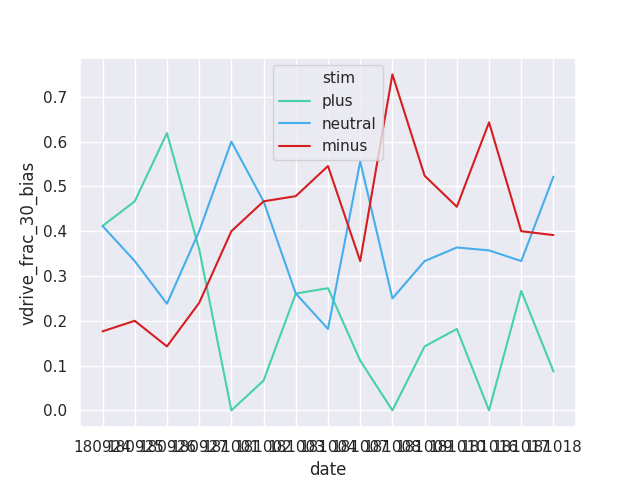

In [25]:
plt.figure()
sns.lineplot(frac_bias_df.date.astype('str'), frac_bias_df.vdrive_frac_30_bias, hue=df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


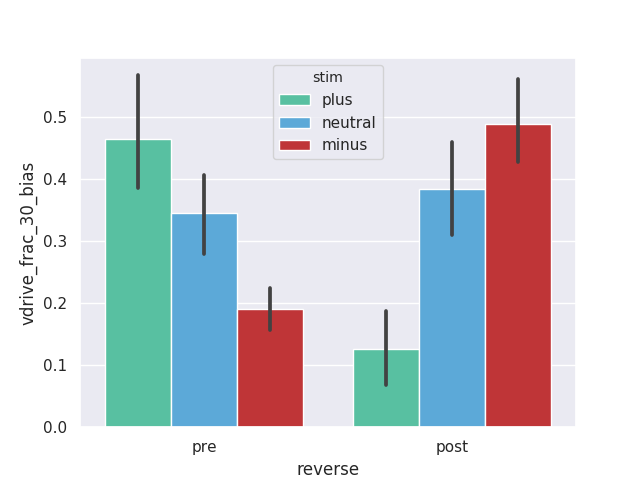

In [28]:
plt.figure()
sns.barplot(frac_bias_df.reverse, frac_bias_df.vdrive_frac_30_bias, hue=df.stim, palette=pool.config.colors())

## Sort

In [11]:
sort_result = []
for date in mouse.dates():
    sort_order = db.get('sort_order', date.mouse, date.date)
    sort_borders = db.get('sort_borders', date.mouse, date.date)
    n_cells = len(sort_order)
    n_plus = sort_borders['neutral']
    n_neutral = sort_borders['minus'] - n_plus
    n_minus = sort_borders['inhibited'] - n_plus - n_neutral
    n_inhibited = n_cells - n_plus - n_neutral - n_minus
    sort_result.append({'mouse': date.mouse,
                        'date': date.date,
                        'stim': 'plus',
                        'n_cells': n_plus,
                        'frac_cells': n_plus / float(n_cells)})
    sort_result.append({'mouse': date.mouse,
                        'date': date.date,
                        'stim': 'neutral',
                        'n_cells': n_neutral,
                        'frac_cells': n_neutral / float(n_cells)})
    sort_result.append({'mouse': date.mouse,
                        'date': date.date,
                        'stim': 'minus',
                        'n_cells': n_minus,
                        'frac_cells': n_minus / float(n_cells)})
    sort_result.append({'mouse': date.mouse,
                        'date': date.date,
                        'stim': 'inhibited',
                        'n_cells': n_inhibited,
                        'frac_cells': n_inhibited / float(n_cells)})
sort_df = pd.DataFrame(sort_result)
sort_df['reverse'] = sort_df.date.apply(lambda x: 'pre' if x < flow.metadata.reversal(mouse.mouse) else 'post')

	updating analysis... Sort OA205 180924
	updating analysis... Stim OA205 180924
	updating analysis... Sort OA205 180925
	updating analysis... Stim OA205 180925
	updating analysis... Sort OA205 180926
	updating analysis... Stim OA205 180926


/code/pool/pool/analyses/stim.py:87: RuntimeWarning: Mean of empty slice
  return np.nanmean(trs, axis=1)


	updating analysis... Sort OA205 180927
	updating analysis... Stim OA205 180927
	updating analysis... Sort OA205 181001
	updating analysis... Stim OA205 181001
	updating analysis... Sort OA205 181002
	updating analysis... Stim OA205 181002
	updating analysis... Sort OA205 181003
	updating analysis... Stim OA205 181003
	updating analysis... Sort OA205 181004
	updating analysis... Stim OA205 181004
	updating analysis... Sort OA205 181007
	updating analysis... Stim OA205 181007
	updating analysis... Sort OA205 181008
	updating analysis... Stim OA205 181008
	updating analysis... Sort OA205 181009
	updating analysis... Stim OA205 181009
	updating analysis... Sort OA205 181010
	updating analysis... Stim OA205 181010


/code/flow/flow/trace2p.py:276: RuntimeWarning: Mean of empty slice
  axis=1)


	updating analysis... Sort OA205 181016
	updating analysis... Stim OA205 181016
	updating analysis... Sort OA205 181017
	updating analysis... Stim OA205 181017
	updating analysis... Sort OA205 181018
	updating analysis... Stim OA205 181018


<IPython.core.display.Javascript object>


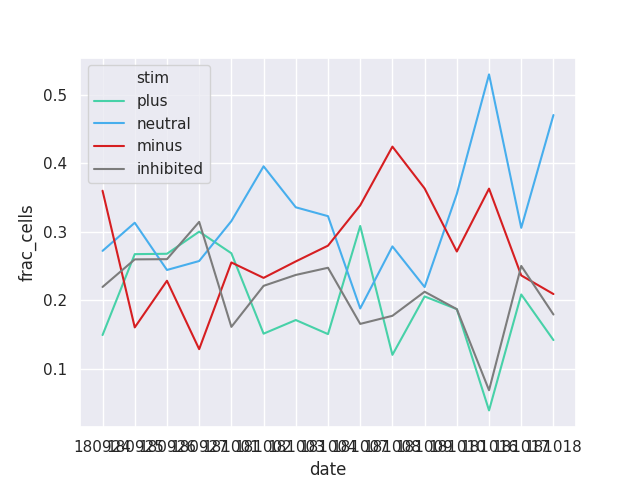

In [34]:
plt.figure()
sns.lineplot(sort_df.date.astype('str'), sort_df.frac_cells, hue=sort_df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


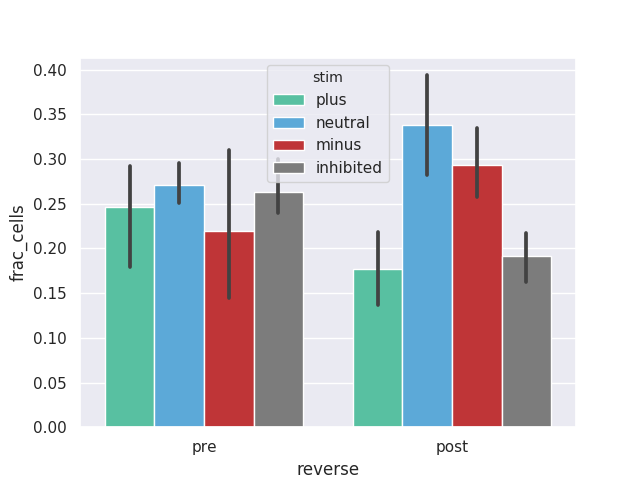

In [13]:
plt.figure()
sns.barplot(sort_df.reverse, sort_df.frac_cells, hue=sort_df.stim, palette=pool.config.colors())

In [14]:
df_list = []
for _, group_df in df.groupby(['mouse', 'date']):
    total_frac = group_df.vdrive_frac.sum()
    group_df['vdrive_frac_bias'] = group_df.vdrive_frac / total_frac
    df_list.append(group_df)
new_df = pd.concat(df_list, ignore_index=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Stim response

In [15]:
result = []
for date in mouse.dates():
    for stim in pool.config.stimuli():
        responses = db.get('stim_dff_{}'.format(stim), date.mouse, date.date)
        vdrive = db.get('vdrive_{}'.format(stim), date.mouse, date.date)
        result.append({'mouse': date.mouse,
                       'date': date.date,
                       'stim': stim,
                       'response_all_mean': responses.mean(),
                       'response_sig_mean': responses[vdrive > 50].mean()})
response_df = pd.DataFrame(result)
response_df['reverse'] = response_df.date.apply(lambda x: 'pre' if x < flow.metadata.reversal(mouse.mouse) else 'post')
response_df['date_str'] = response_df.date.astype('str')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


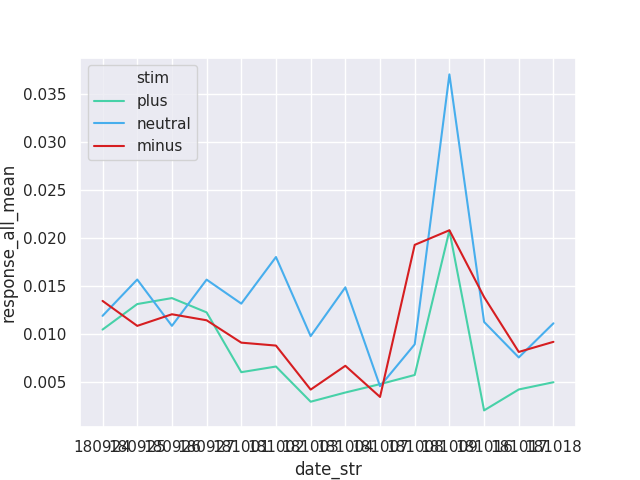

In [16]:
plt.figure()
sns.lineplot('date_str', 'response_all_mean', hue='stim', data=response_df, palette=pool.config.colors())

<IPython.core.display.Javascript object>


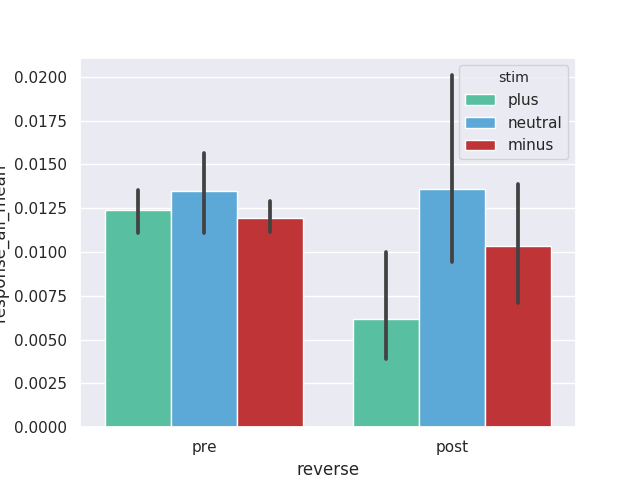

In [17]:
plt.figure()
sns.barplot(response_df.reverse, response_df.response_all_mean, hue=response_df.stim, palette=pool.config.colors())

<IPython.core.display.Javascript object>


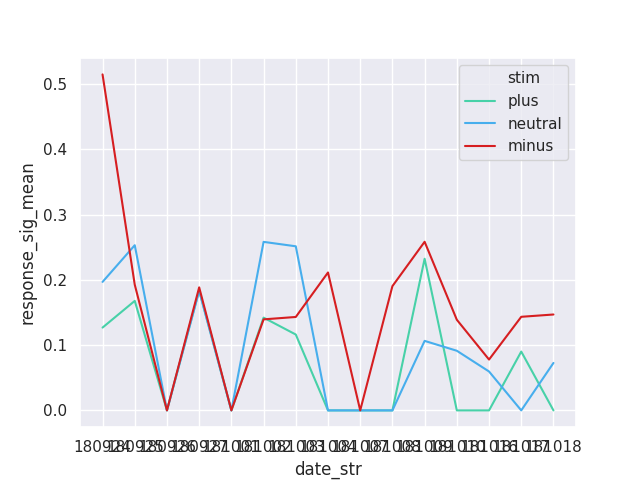

In [18]:
temp_df = response_df.copy()
temp_df = temp_df.fillna(0)
plt.figure()
sns.lineplot('date_str', 'response_sig_mean', hue='stim', data=temp_df, palette=pool.config.colors())

<IPython.core.display.Javascript object>


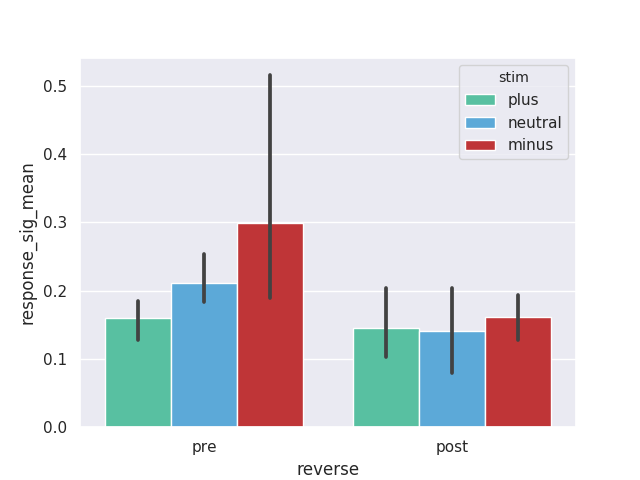

In [19]:
plt.figure()
sns.barplot(response_df.reverse, response_df.response_sig_mean, hue=response_df.stim, palette=pool.config.colors())